In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

files = os.listdir(path)

csv_file = [f for f in files if f.endswith(".csv")][0]
df = pd.read_csv(os.path.join(path, csv_file))

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


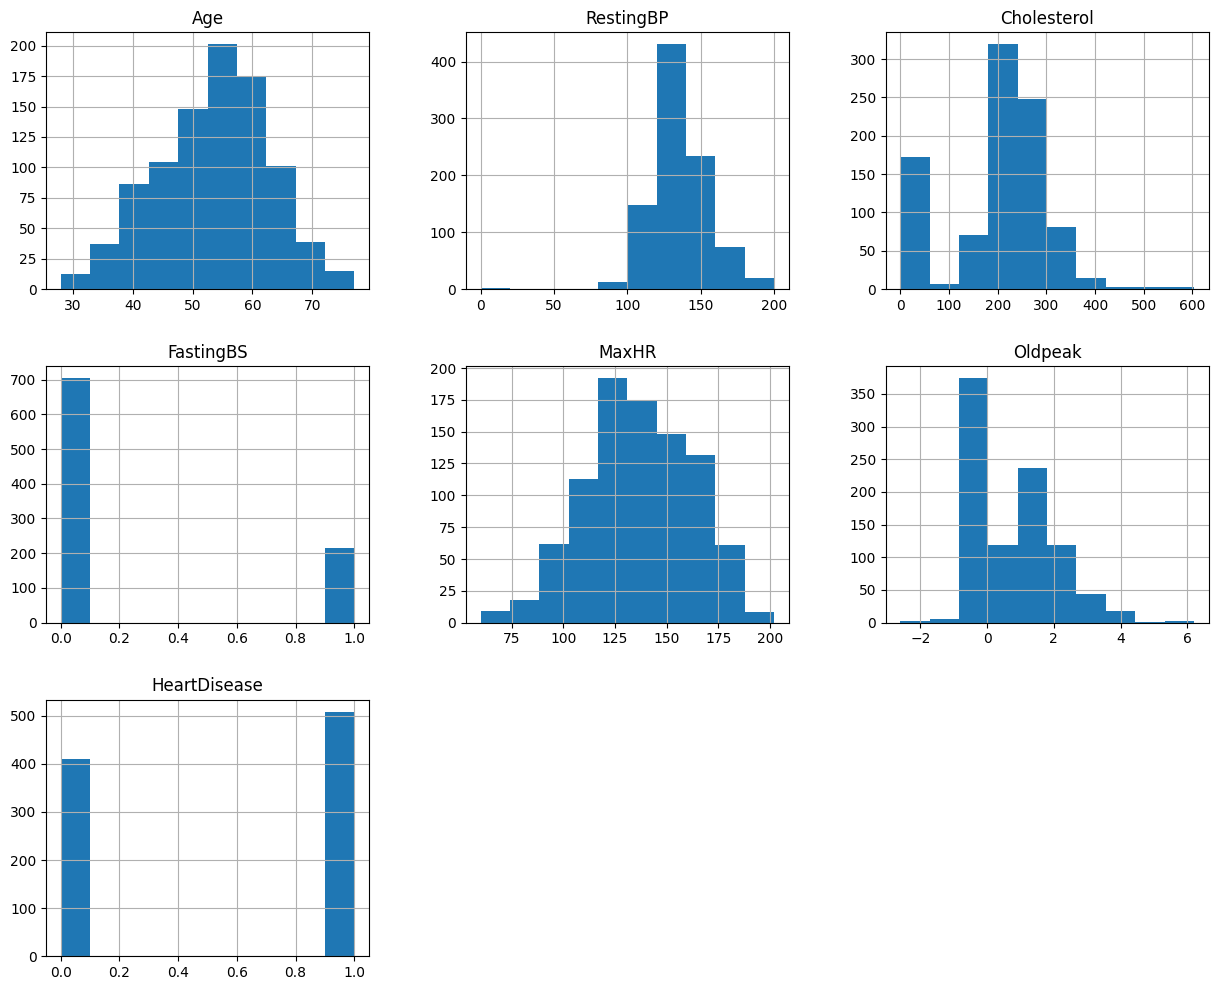

In [ ]:
df.hist(figsize=(15, 12))
plt.show()

In [ ]:
df.head(100)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,M,ASY,130,263,0,Normal,140,Y,2.0,Flat,1
96,43,M,ATA,142,207,0,Normal,138,N,0.0,Up,0
97,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0


In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
X = df.drop(['HeartDisease'], axis=1, inplace=False)
y = df['HeartDisease']
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})
df['ChestPainType'] = df['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

In [ ]:
X.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,0,140,289,0,0,172,0,0.0,0
1,49,0,1,160,180,0,0,156,0,1.0,1
2,37,1,0,130,283,0,1,98,0,0.0,0
3,48,0,2,138,214,0,0,108,1,1.5,1
4,54,1,1,150,195,0,0,122,0,0.0,0
5,39,1,1,120,339,0,0,170,0,0.0,0
6,45,0,0,130,237,0,0,170,0,0.0,0
7,54,1,0,110,208,0,0,142,0,0.0,0
8,37,1,2,140,207,0,0,130,1,1.5,1
9,48,0,0,120,284,0,0,120,0,0.0,0


In [ ]:
y.head(10)

,HeartDisease
0,0
1,1
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [ ]:
#importar a função que faz a separação do X e y em conjunto de treino e teste

from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
X_treino.shape

(734, 11)

In [ ]:
y_treino.shape

(734,)

In [ ]:
X_treino.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
485,63,1,0,139,217,1,1,128,1,1.2,1
486,55,1,0,110,214,1,1,180,0,0.4,0
117,59,0,2,130,338,1,1,130,1,1.5,1
361,47,1,2,160,0,0,0,124,1,0.0,1
296,50,1,2,145,0,1,0,139,1,0.7,1


In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN, SVMSMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import NearMiss
estrategia = {0: 1000000, 1: 1000000}

smt = SVMSMOTE(sampling_strategy=estrategia, k_neighbors=3)
#smt = SMOTEENN(sampling_strategy=estrategia, smote=SMOTE(sampling_strategy=estrategia, k_neighbors=7))
nm = NearMiss()

X_smote, y_smote = smt.fit_resample(X_treino,y_treino)
X_near, y_near = nm.fit_resample(X_treino, y_treino)